# Exploratory Data Analysis

## Objectives
* Show the distribution of the classes.
* Show a basic description of the features' statistics.
* Show the distributions of the features.
* Show distributions of the features when split by class.
* Check for multicolinearity.
* Check for outliers
* Form hypotheses about the data.

I will start off by importing the necessary libraries.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd # dataframes
import matplotlib.pyplot as plt # visializations
import seaborn as sns # visualizations
from scipy.stats import zscore, iqr

Now I will load the .csv file into a dataframe and preview it.

In [2]:
# Load file into a dataframe and preview it
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Now I will save the Class column as 'target' and all the other columns as 'feats'

In [3]:
# Save the Class column as 'target' and all the other columns as 'feats'
target = df.Class
feats = df.drop('Class', axis=1)

#### Show the distribution of the classes

In [4]:
# Show the ratio between the two classes
target.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

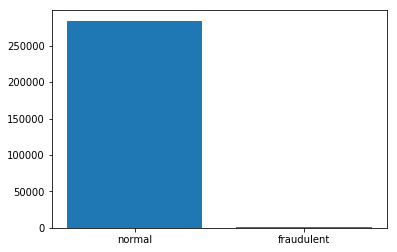

In [5]:
# Visualy show the differences between classes
classes = ['normal', 'fraudulent']
amounts = target.value_counts()
plt.bar(classes, amounts);

This dataset is highly imbalanced.

#### Show a basic description of the features' statistics

In [6]:
# Show features basic statistics
feats.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


Time and Amount are on a completely different scales than the the other features.

#### Show the distributions of the features

Now I will create histograms and kernel density estimation plots to show the distribution of each feature.

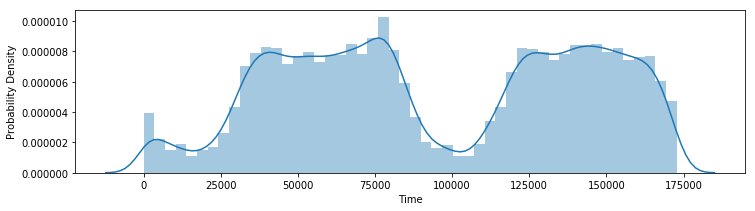

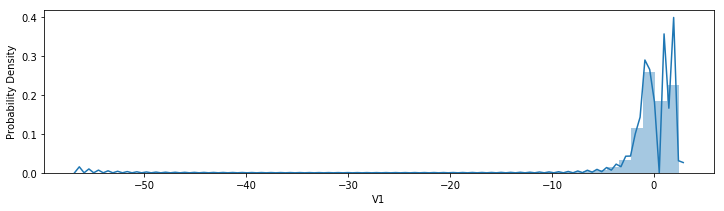

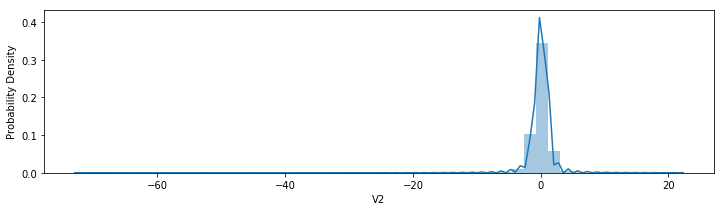

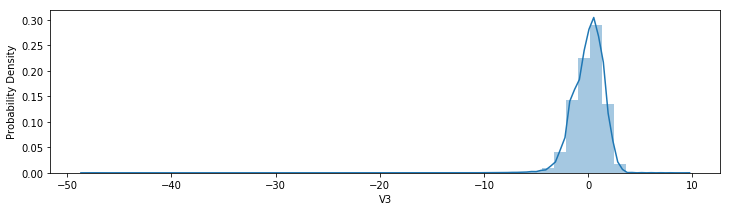

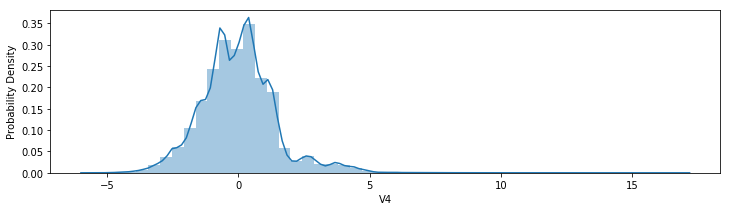

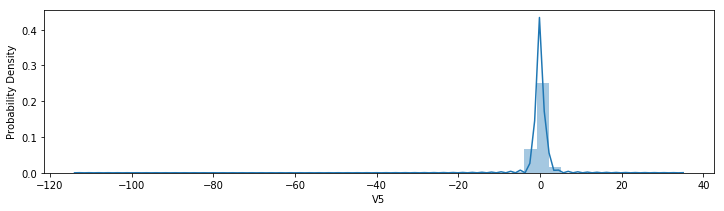

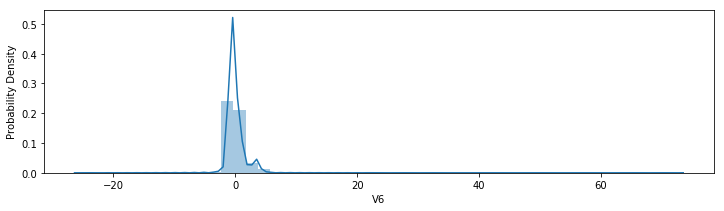

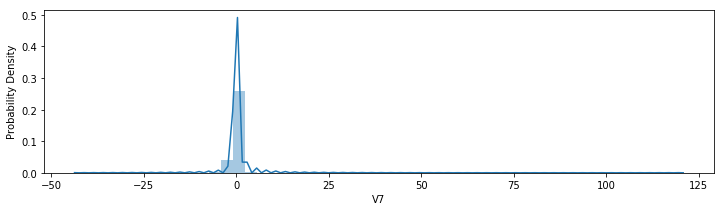

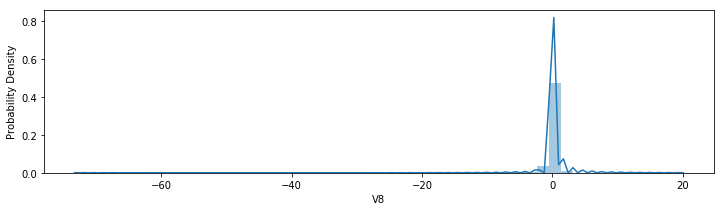

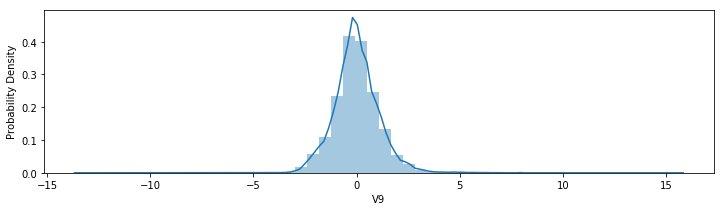

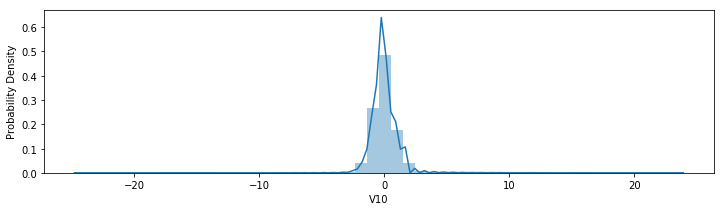

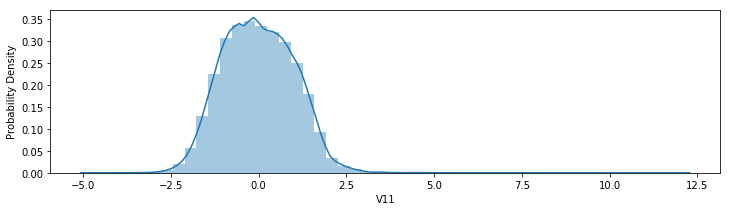

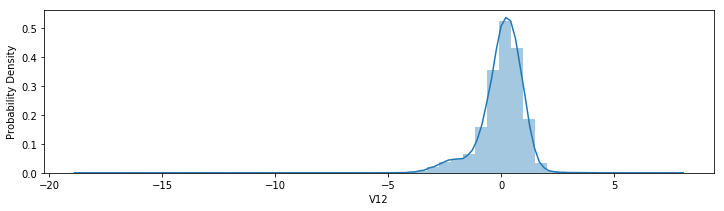

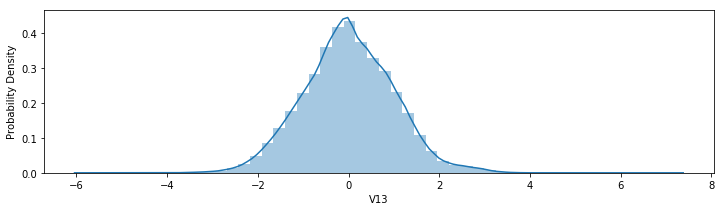

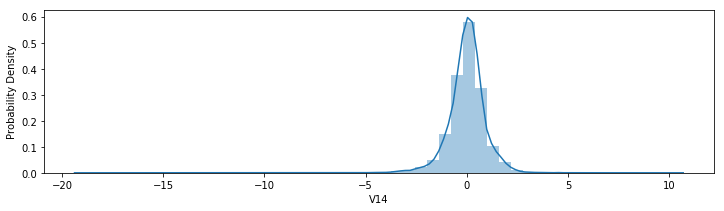

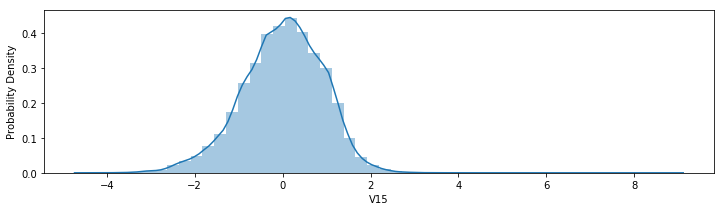

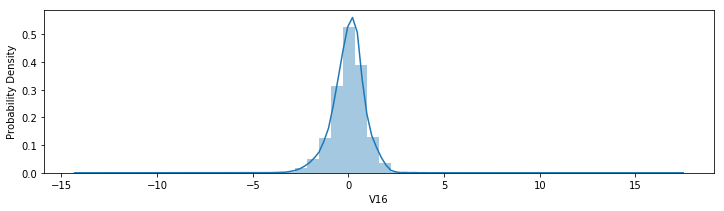

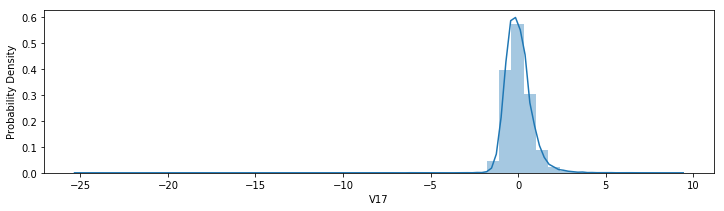

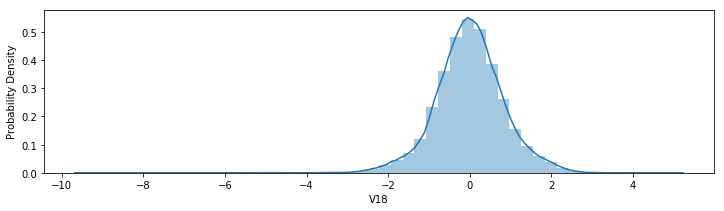

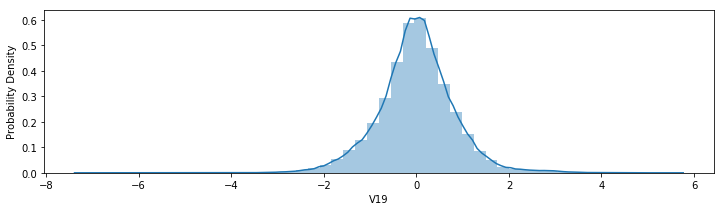

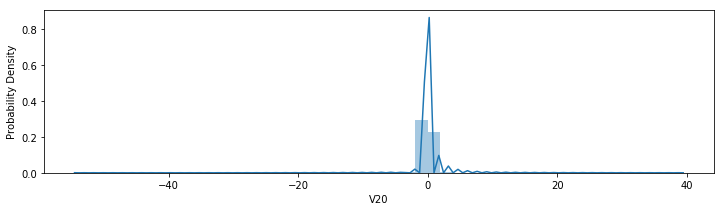

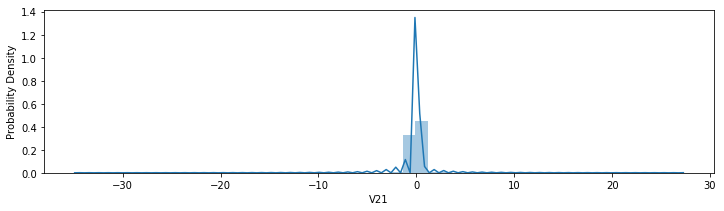

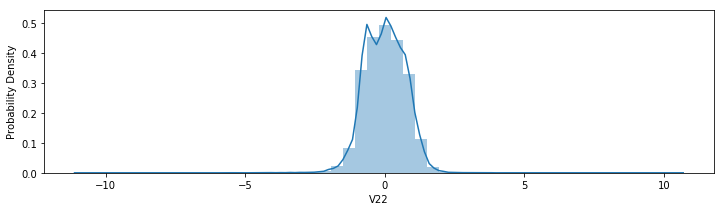

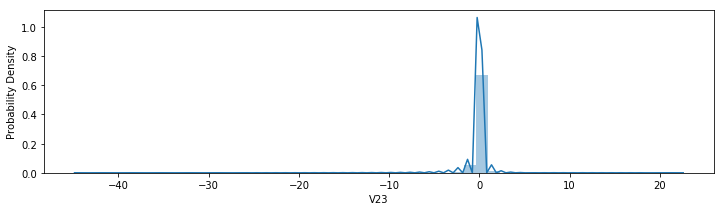

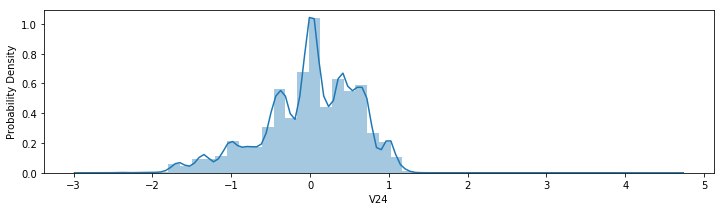

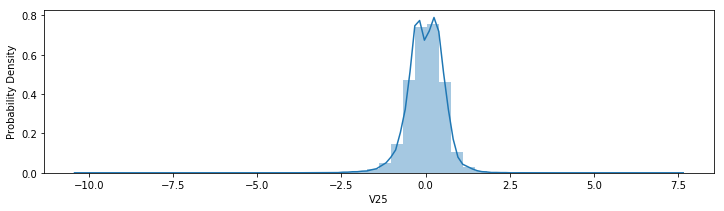

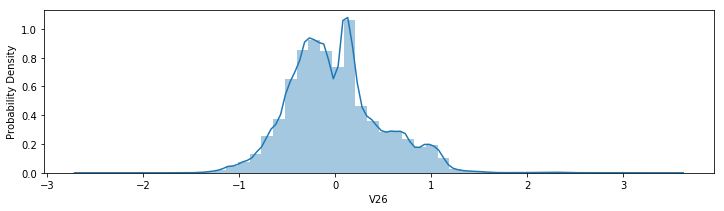

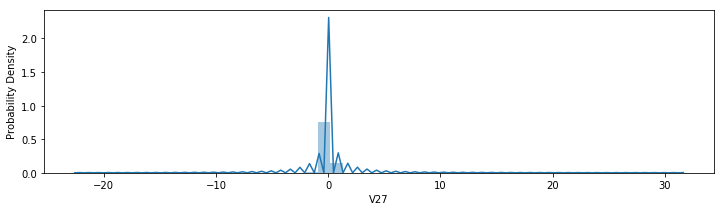

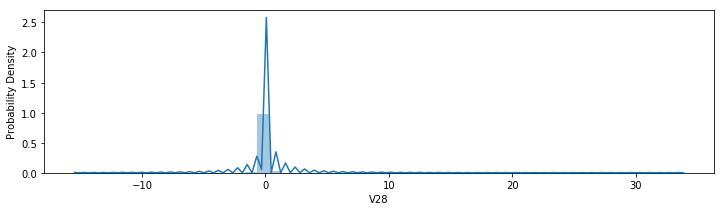

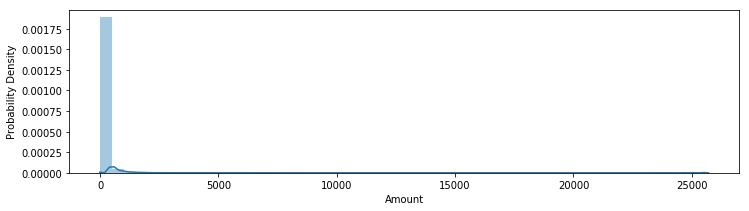

In [7]:
# Plot histograms and KDEs for each feature
for col in feats:
    plt.figure(figsize=(12,3))
    plt.ylabel('Probability Density')
    sns.distplot(df[col])
    plt.show()

There is alot of variance in the in all of the features except time.

#### Show distributions of the features when split by class

Now I will show the distribution of the features when split by class. I will use histograms and kernel density estimation plots again. I will plot vertical lines for the maximum and minimum values for each set to show where they lie.

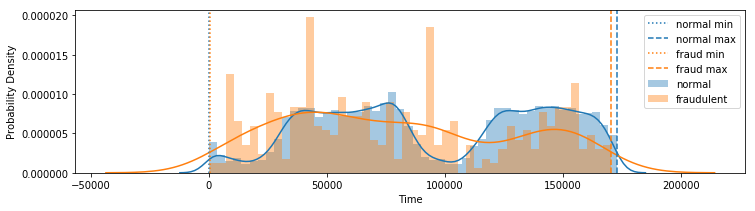

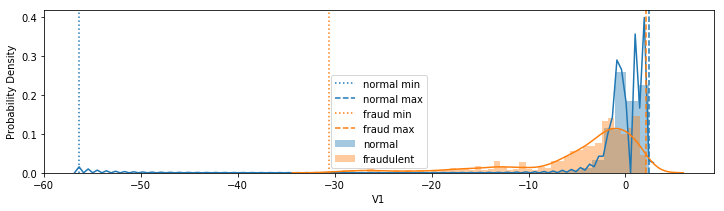

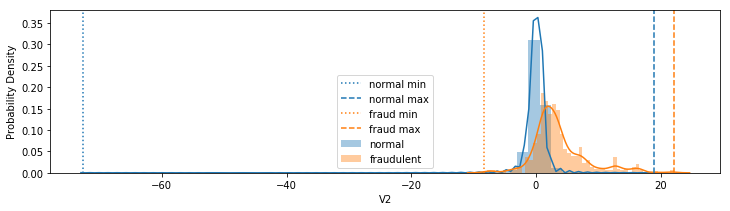

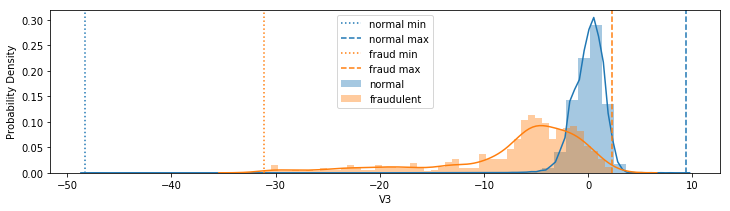

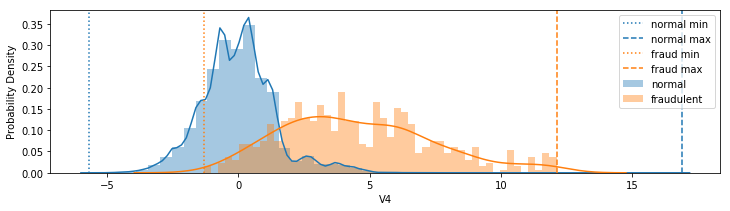

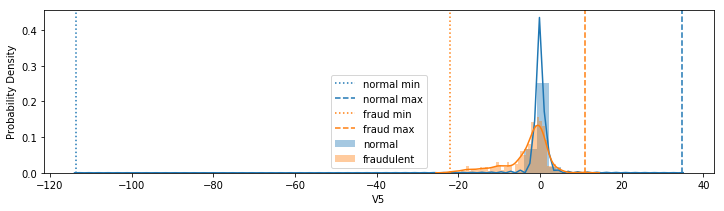

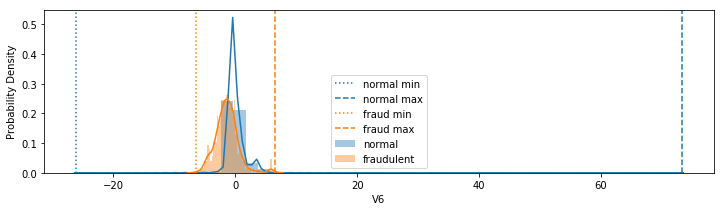

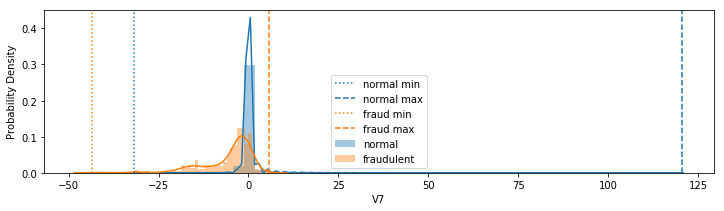

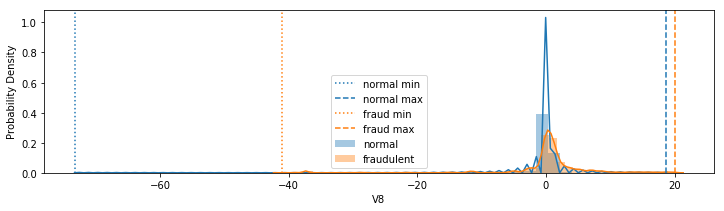

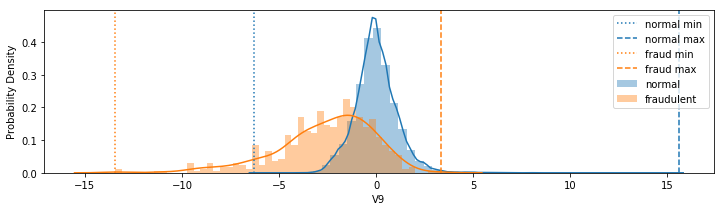

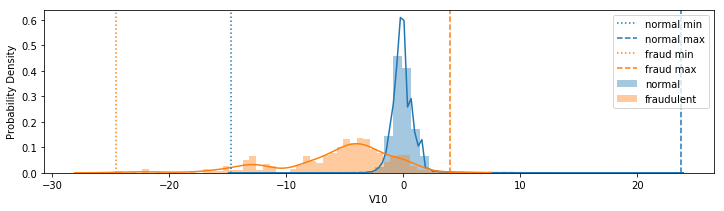

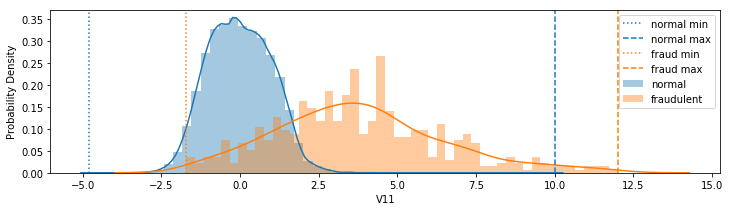

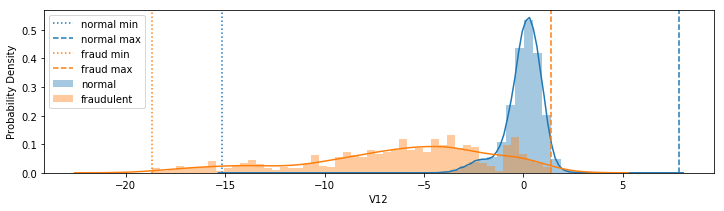

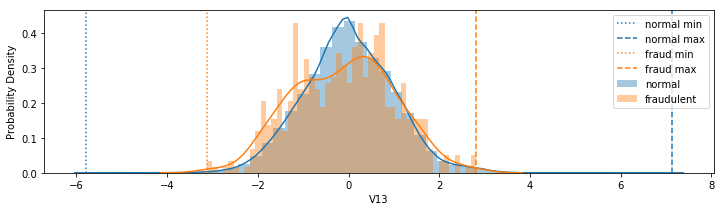

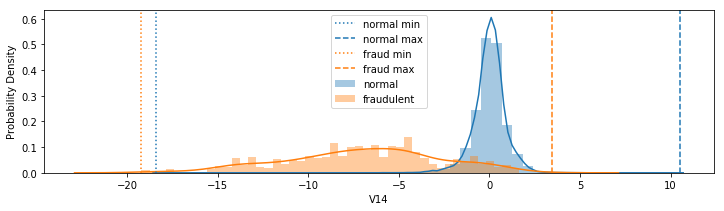

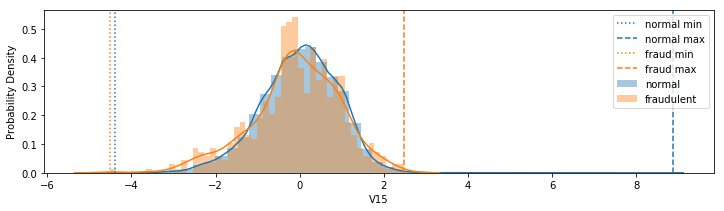

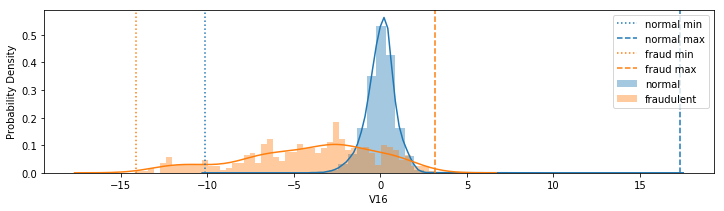

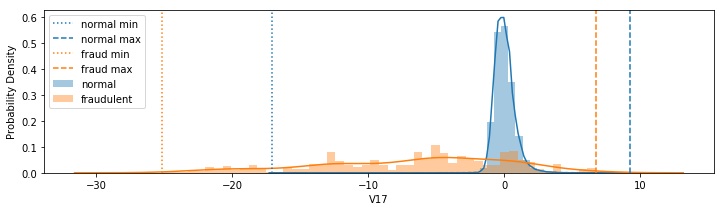

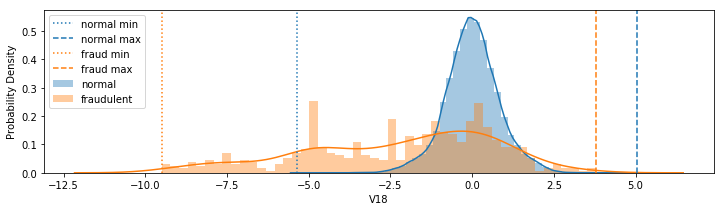

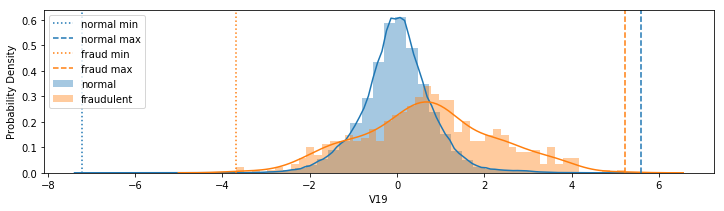

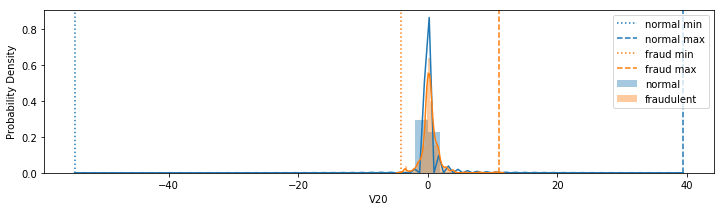

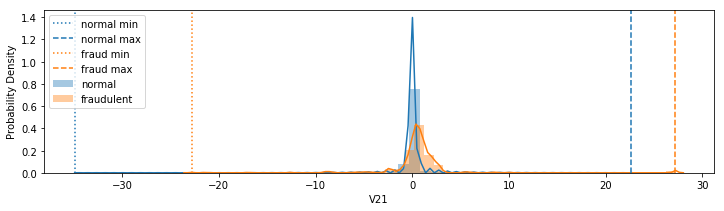

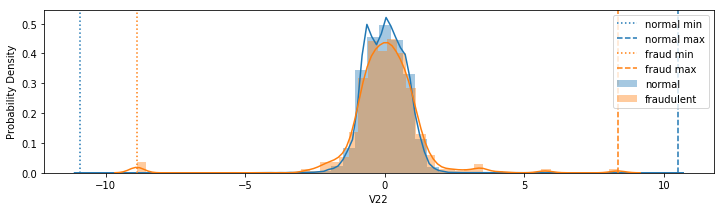

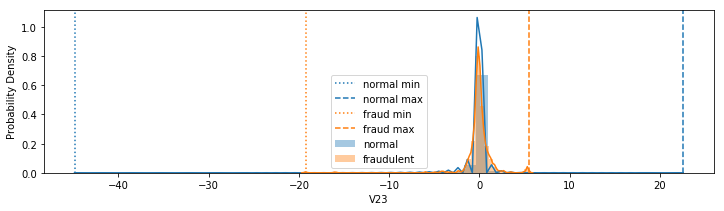

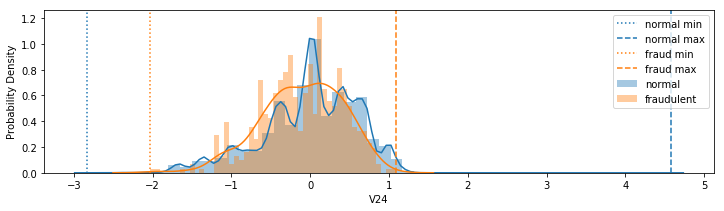

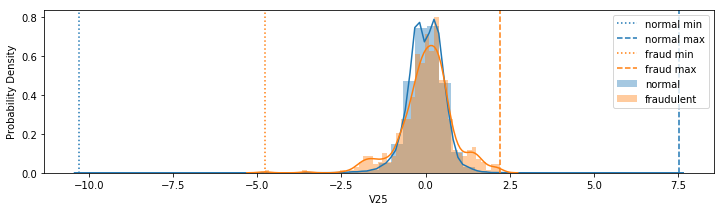

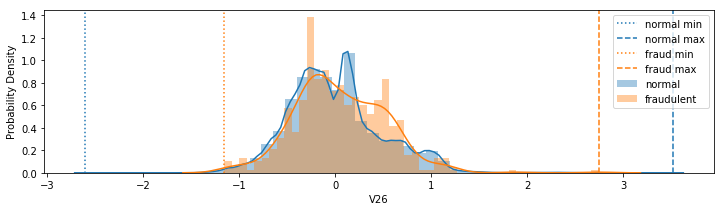

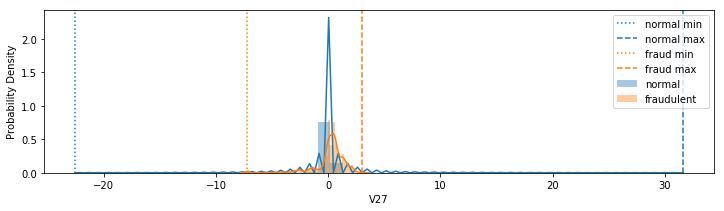

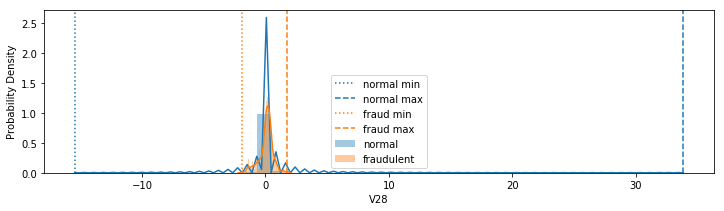

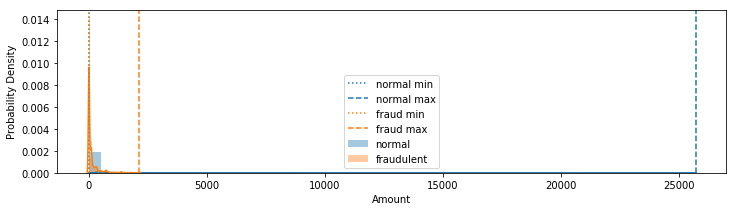

In [8]:
# Split each feature by class and then plot histograms and KDEs
for col in feats:
    x0 = df[target == 0][col]
    x1 = df[target == 1][col]
    plt.figure(figsize=(12,3))
    plt.ylabel('Probability Density')
    sns.distplot(x0, bins=50, label='normal')
    sns.distplot(x1, bins=50, label='fraudulent')
    
    # Plot vertical lines
    plt.axvline(x0.min(), label='normal min', linestyle=':')
    plt.axvline(x0.max(), label='normal max', linestyle='--')
    plt.axvline(x1.min(), label='fraud min', color='C1', linestyle=':')
    plt.axvline(x1.max(), label='fraud max', color='C1', linestyle='--')
    
    
    plt.legend()
    plt.show()

There are two things to notice here:
* There are times of day when the ratio between normal and fraudlent activity varies largely.
* Principal component features 1, 5, 6, 8, 13, 15, 20, 21, 22, 23, 24, 25, and 26 do not seem to vary much when split by classes.


#### Check for multicolinearity

First I will show the correlation between feature using two heatmaps. One will be a boolean heatmap with a threshold of +/- 70% and the other will be a regular continuous heatmap.

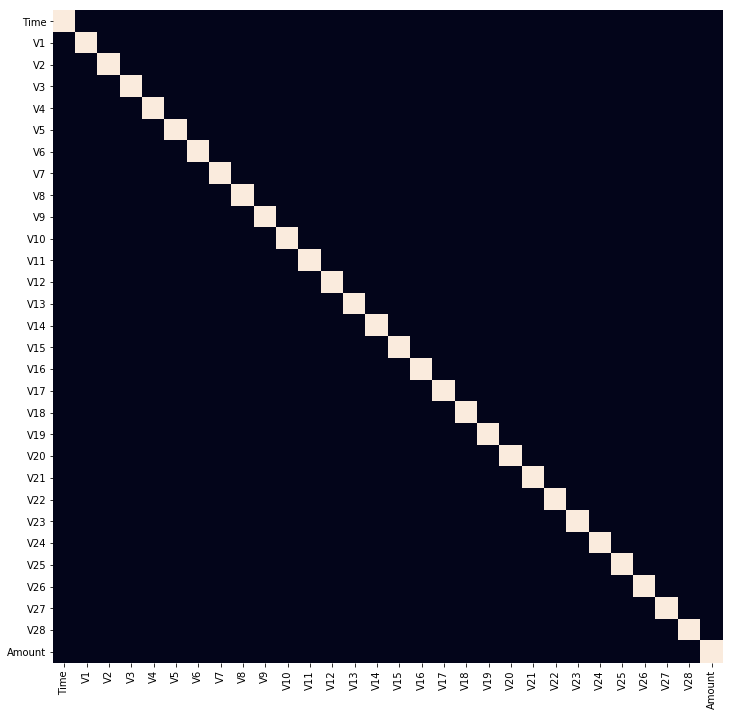

In [9]:
# Plot boolean heatmap 
plt.figure(figsize=(12,12))
sns.heatmap(abs(feats.corr())>0.7, cbar=False);

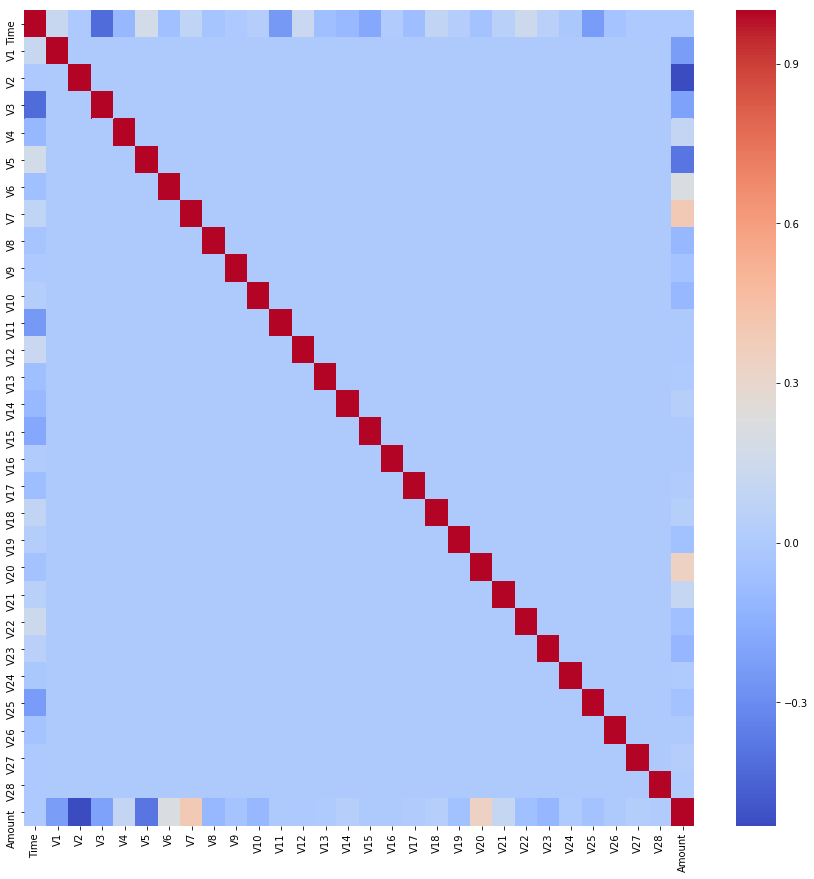

In [10]:
# Plot continous heatmap
plt.figure(figsize=(15,15))
sns.heatmap(feats.corr(), cmap='coolwarm');

There is very little correlation between features.

#### Check for outliers

In this section I will check for outliers based on zscore and inter-quartile range. I refreshed myself on how to check for these outliers using this <a href='https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba'>blog post</a> that I listed as source 1. 

I wil now plot each feature along where the boundiries are for outliers based on an absolute zscore of 3 and 4. I will also plot the boundaries for outliers based on 1.5 IQR. I will also count the outliers by each measure.

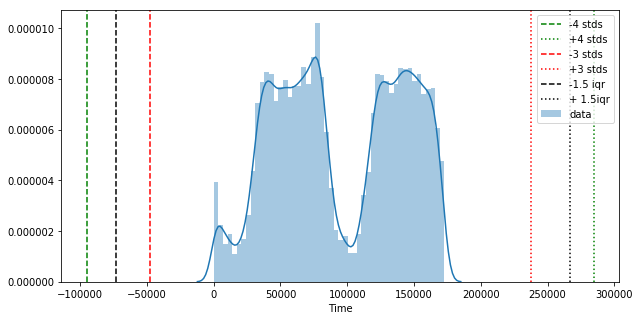

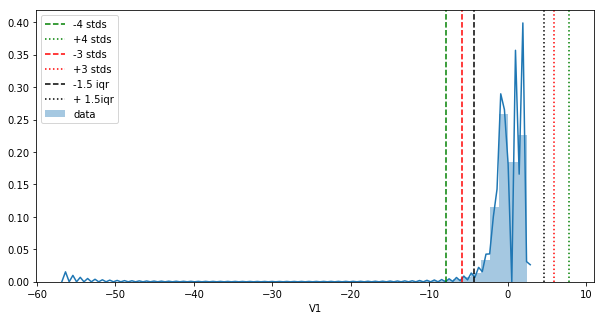

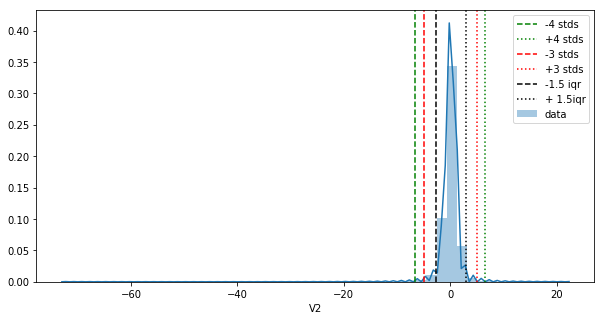

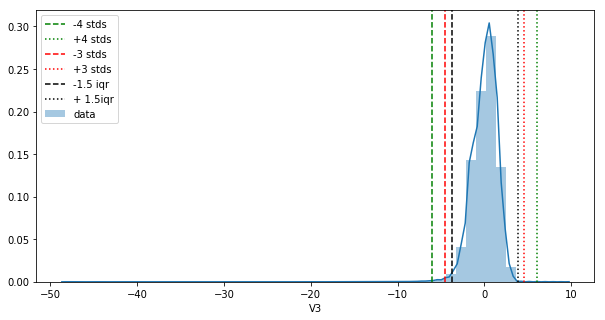

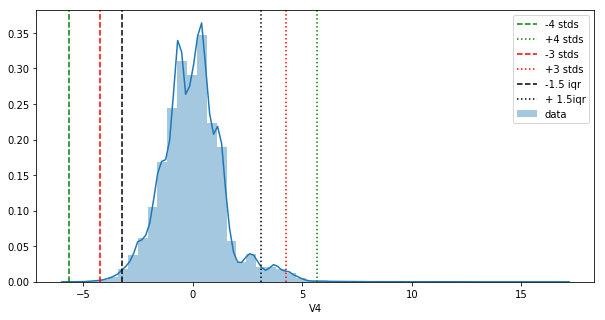

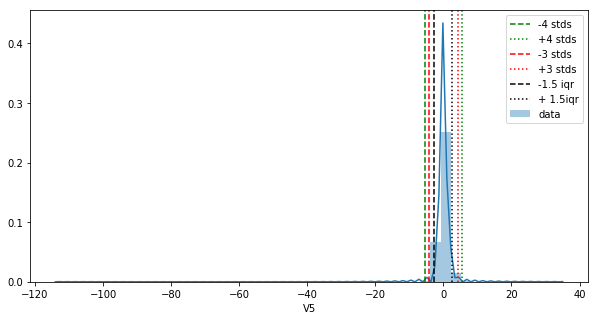

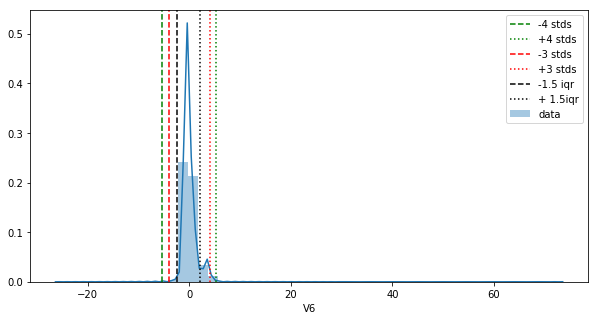

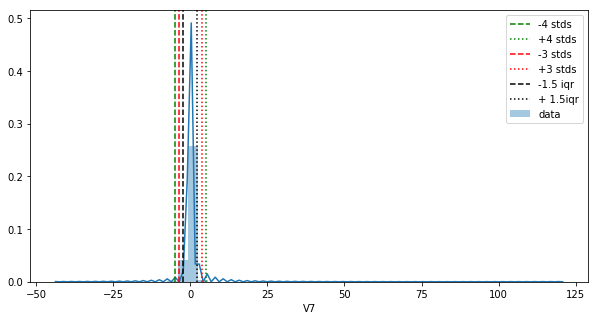

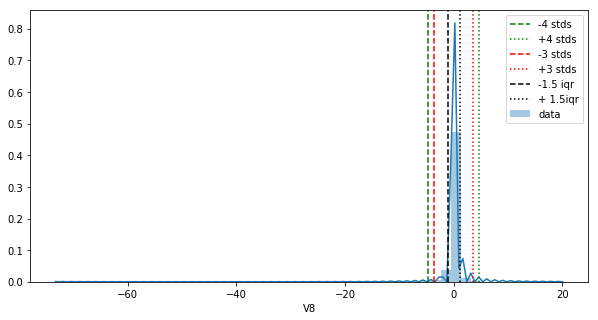

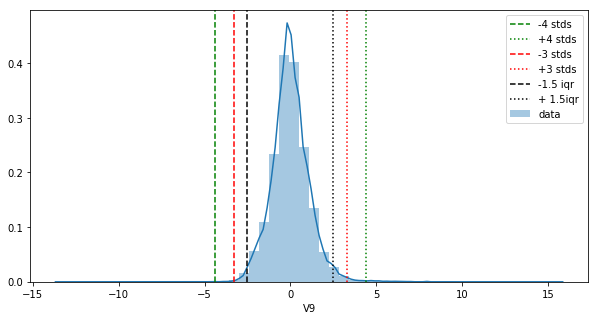

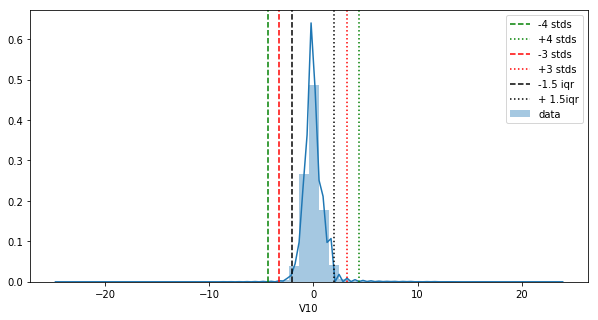

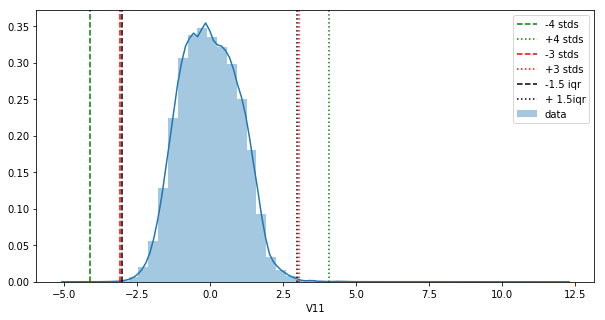

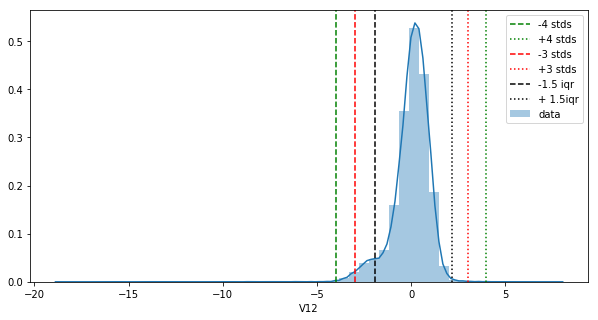

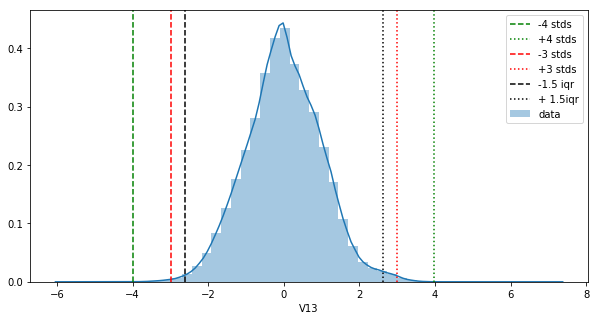

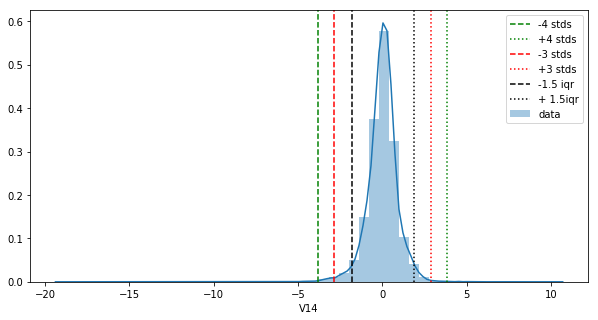

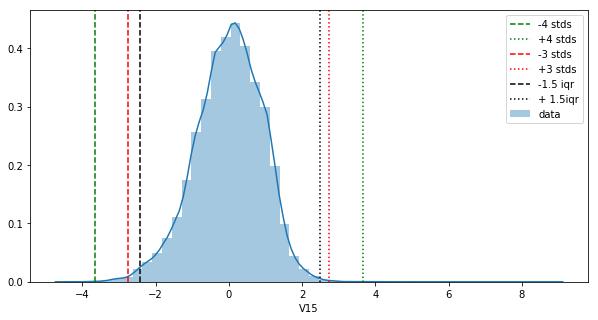

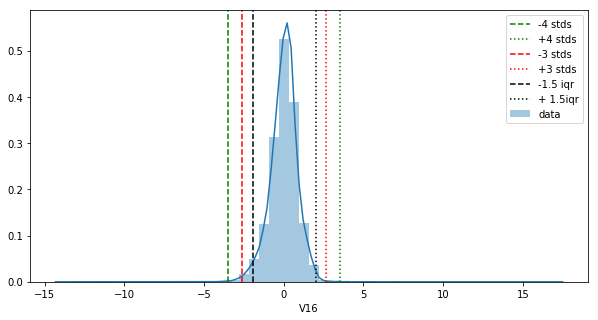

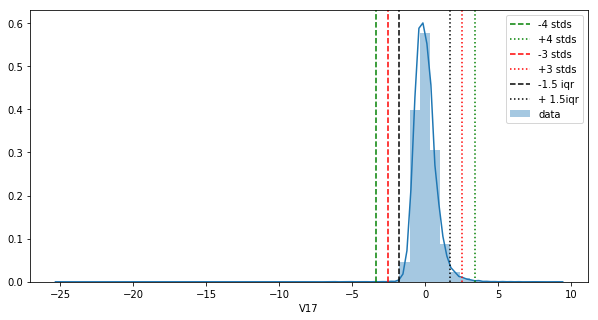

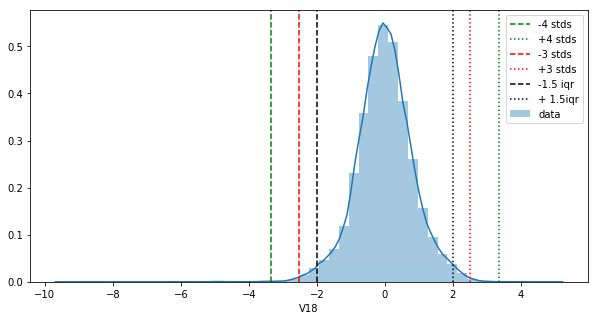

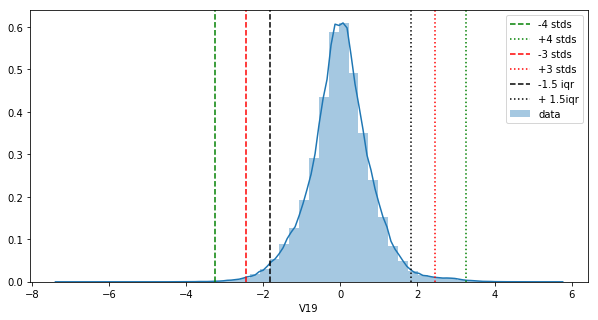

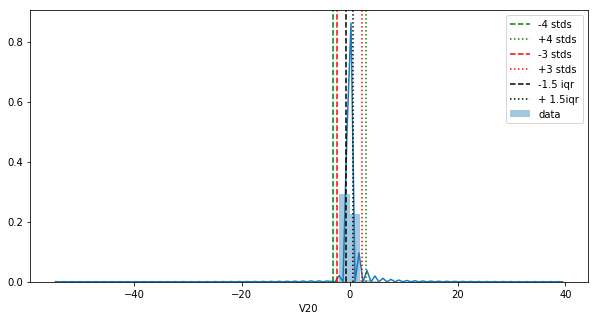

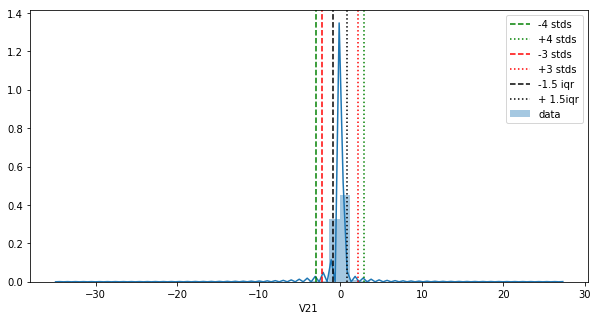

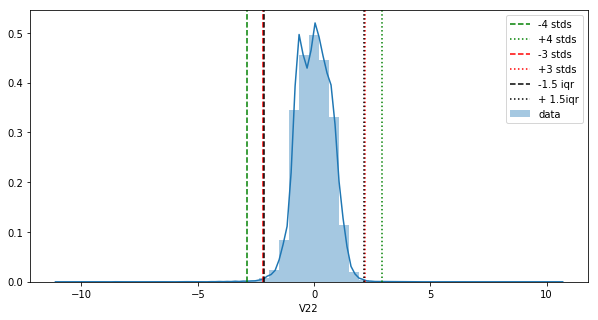

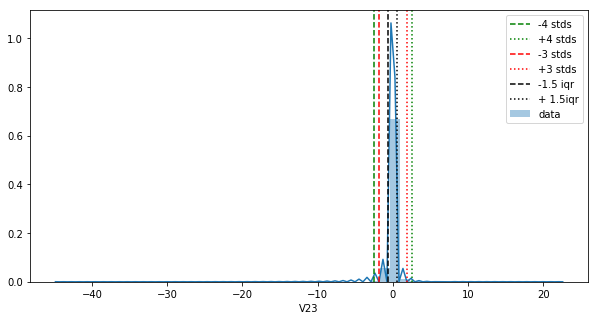

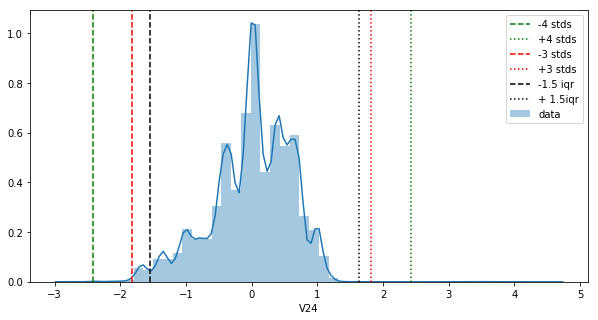

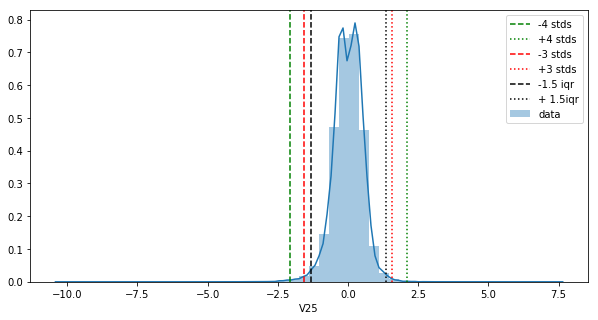

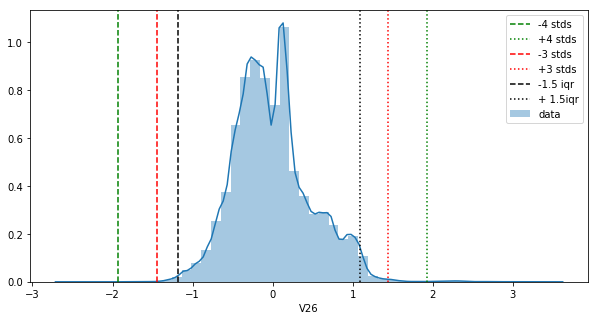

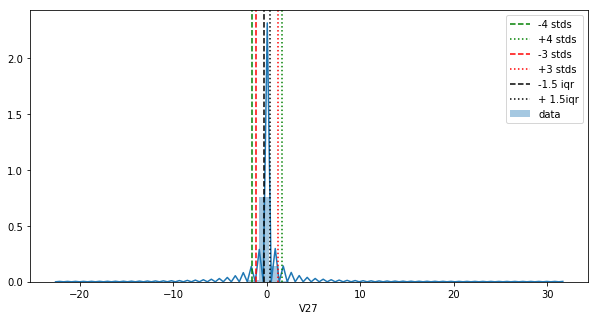

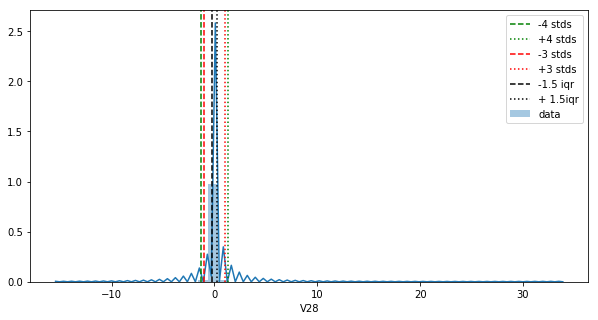

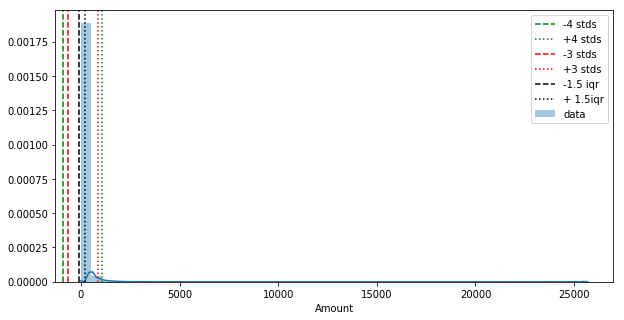

In [11]:
# Plot every feature 
# Plot the boundary for outliers based on zscore
# Plot the boundary for outliers based on interquartile range
# Count outliers

# Plot every feature
for col in feats:
    plt.figure(figsize=(10, 5))
    sns.distplot(feats[col], label='data')
    
    # Plot boundarys
    bn4 = np.mean(feats[col]) - 4*np.std(feats[col])
    bp4 = np.mean(feats[col]) + 4*np.std(feats[col])
    bn3 = np.mean(feats[col]) - 3*np.std(feats[col])
    bp3 = np.mean(feats[col]) + 3*np.std(feats[col])
    iqr15n = feats[col].quantile(0.25) - 1.5*iqr(feats[col])
    iqr15p = feats[col].quantile(0.75) + 1.5*iqr(feats[col])
    
    for boundary, color, label, linestyle in zip([bn4, bp4, bn3, bp3, iqr15n, iqr15p],
                               ['green', 'green', 'red', 'red', 'black', 'black'],
                               ['-4 stds', '+4 stds', '-3 stds', '+3 stds', '-1.5 iqr', '+ 1.5iqr'],
                               ['--', ':', '--', ':', '--', ':']):
        plt.axvline(boundary, color=color, label=label, linestyle = linestyle)
        
    # Finish plot
    plt.legend()
    plt.show()

In [13]:
ol3_indices = []
ol4_indices = []
oliqr_indices = []

for col in feats: 
    # Count outliers for each measure
    ol3 = feats[abs(zscore(feats[col])) > 3]
    ol4 = feats[abs(zscore(feats[col])) > 4]
    oliqr = feats[(feats[col] < feats[col].quantile(0.25) - 1.5*iqr(feats[col])) | 
                      (feats[col] > feats[col].quantile(0.75) + 1.5*iqr(feats[col]))]
    
    # Print out the counts
    print("{} has {} values outside 3 standard deviations from the mean".format(col, len(ol3)))
    print("{} has {} values outside 4 standard deviations from the mean".format(col, len(ol4)))
    print("{} has {} values outside 1.5 Interquartile ranges from the first and third quartile".format(col, len(oliqr)))
    
    # Print out percents
    print("{} is %{} outliers (std3)".format(col, 100*len(ol3)/len(df)))
    print("{} is %{} outliers (std4)".format(col, 100*len(ol4)/len(df)))
    print("{} is %{} outliers (iqr)".format(col, 100*len(oliqr)/len(df)))
    
    for ele in ol3.index:
        ol3_indices.append(ele)
        
    for ele in ol4.index:
        ol4_indices.append(ele)
        
    for ele in oliqr.index:
        oliqr_indices.append(ele)
        
print("Total amount of outliers by 3 std: {}, %{}".format(len(set(ol3_indices)), 100*len(set(ol3_indices))/len(df)))

print("Total amount of outliers by 4 std: {}, %{}".format(len(set(ol4_indices)), 100*len(set(ol4_indices))/len(df)))

print("Total amount of outliers by 1.5 IQR: {}, %{}".format(len(set(oliqr_indices)), 100*len(set(oliqr_indices))/len(df)))

Time has 0 values outside 3 standard deviations from the mean
Time has 0 values outside 4 standard deviations from the mean
Time has 0 values outside 1.5 Interquartile ranges from the first and third quartile
Time is %0.0 outliers (std3)
Time is %0.0 outliers (std4)
Time is %0.0 outliers (iqr)
V1 has 3701 values outside 3 standard deviations from the mean
V1 has 1871 values outside 4 standard deviations from the mean
V1 has 7062 values outside 1.5 Interquartile ranges from the first and third quartile
V1 is %1.2994764875863305 outliers (std3)
V1 is %0.6569361005874154 outliers (std4)
V1 is %2.4795738868777804 outliers (iqr)
V2 has 4318 values outside 3 standard deviations from the mean
V2 has 2182 values outside 4 standard deviations from the mean
V2 has 13526 values outside 1.5 Interquartile ranges from the first and third quartile
V2 is %1.516114421344981 outliers (std3)
V2 is %0.7661328548806736 outliers (std4)
V2 is %4.749181024342801 outliers (iqr)
V3 has 1987 values outside 3 sta

V25 has 2809 values outside 3 standard deviations from the mean
V25 has 859 values outside 4 standard deviations from the mean
V25 has 5367 values outside 1.5 Interquartile ranges from the first and third quartile
V25 is %0.986281938295056 outliers (std3)
V25 is %0.30160775542735957 outliers (std4)
V25 is %1.8844340202312444 outliers (iqr)
V26 has 1047 values outside 3 standard deviations from the mean
V26 has 516 values outside 4 standard deviations from the mean
V26 has 5596 values outside 1.5 Interquartile ranges from the first and third quartile
V26 is %0.367617368955117 outliers (std3)
V26 is %0.18117532223575966 outliers (std4)
V26 is %1.964839347347502 outliers (iqr)
V27 has 4771 values outside 3 standard deviations from the mean
V27 has 2844 values outside 4 standard deviations from the mean
V27 has 39163 values outside 1.5 Interquartile ranges from the first and third quartile
V27 is %1.6751695007496306 outliers (std3)
V27 is %0.9985709620901172 outliers (std4)
V27 is %13.7507

## Notes
* Features have alot of variance except for time
* There are times of day when the ratio between normal and fraudlent activity varies largely.

## Sources
1) Blog post on detecting outliers https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba